In [1]:
import pandas as pd
import os
import shutil

base_dir = '/mnt/idd_intern/liyao.wang/BindCraft/IL23_BC_traj/IL23_BC_Backbone'
root_dir = [
    f"{base_dir}/IL23_traj1",
    f"{base_dir}/IL23_traj2",
    f"{base_dir}/IL23_traj3",
    f"{base_dir}/IL23_traj4_L30-50",
    f"{base_dir}/IL23_traj5_L30-50",
    f"{base_dir}/IL23_traj6_L30-50",]

dfs = []
for dir in root_dir:
    bb_stat_df = pd.read_csv(f'{dir}/mpnn_bb_score_stats.csv')
    bb_stat_df['Design'] = bb_stat_df['Design'].apply(lambda x: os.path.join(dir, "Trajectory", f"{x}.pdb"))
    dfs.append(bb_stat_df)

bb_stat_df = pd.concat(dfs, ignore_index=True)
bb_stat_df['length'] = bb_stat_df['Sequence'].apply(lambda x: len(x))
bb_stat_L50 = bb_stat_df[bb_stat_df['length'] <= 50]
bb_stat_M50 = bb_stat_df[bb_stat_df['length'] > 50]
print(bb_stat_L50.shape)
print(bb_stat_M50.shape)

def sort_df(df, top_n=10):
    avg_scores = df.groupby('Design')['MPNN_score'].mean()
    avg_scores = avg_scores.sort_values(ascending=True)
    print(avg_scores.shape)
    #display(avg_scores.head(10))

    return avg_scores.iloc[:top_n]

top_L50_df = sort_df(bb_stat_L50, top_n=250)
top_M50_df = sort_df(bb_stat_M50, top_n=250)
merged_df = pd.concat([top_L50_df, top_M50_df], axis=0).sort_values(ascending=True)
print(merged_df.shape)
merged_df = merged_df.drop_duplicates()
print(merged_df.shape)

#merged_df.to_csv(f'/mnt/idd_intern/liyao.wang/BindCraft/IL23_BC_traj/IL23_BC_topBB_designs.csv', index=True, header=True)

(19860, 6)
(12380, 6)
(986,)
(619,)
(500,)
(500,)


In [3]:
import pandas as pd
import os
import shutil

base_dir = "/mnt/idd_intern/liyao.wang/BindCraft/IL23_BC_traj/IL23_BC_PMPNN"

root_dir = [
    f"/mnt/idd_intern/liyao.wang/BindCraft/IL23_BC_traj/IL23_traj1",
    f"/mnt/idd_intern/liyao.wang/BindCraft/IL23_BC_traj/IL23_traj2",
    f"/mnt/idd_intern/liyao.wang/BindCraft/IL23_BC_traj/IL23_traj3",
    f"/mnt/idd_intern/liyao.wang/BindCraft/IL23_BC_traj/IL23_traj4_L30-50",
    f"/mnt/idd_intern/liyao.wang/BindCraft/IL23_BC_traj/IL23_traj5_L30-50",
    f"/mnt/idd_intern/liyao.wang/BindCraft/IL23_BC_traj/IL23_traj6_L30-50",]

root_dir = [f"{base_dir}/traj{i}" for i in range(1, 7)]

dfs = []
for dir in root_dir:
    bb_stat_df = pd.read_csv(f'{dir}/final_design_stats.csv')
    print(bb_stat_df.shape)
    dfs.append(bb_stat_df)

bb_stat_df = pd.concat(dfs, ignore_index=True)
print(bb_stat_df.shape)
bb_stat_df = bb_stat_df.drop_duplicates(subset=['Sequence'])
print(bb_stat_df.shape)
bb_stat_df.to_csv(f'{base_dir}/IL23_BC_PMPNN_final_design_stats.csv', index=False, header=True)

(2256, 232)
(2238, 232)
(2201, 232)
(2311, 232)
(2291, 232)
(2249, 232)
(13546, 232)
(13546, 232)


In [2]:
merged_df.index

Index(['/mnt/idd_intern/liyao.wang/BindCraft/IL23_BC_traj/IL23_traj1/Trajectory/IL23_l73_s850935.pdb',
       '/mnt/idd_intern/liyao.wang/BindCraft/IL23_BC_traj/IL23_traj3/Trajectory/IL23_l78_s697539.pdb',
       '/mnt/idd_intern/liyao.wang/BindCraft/IL23_BC_traj/IL23_traj3/Trajectory/IL23_l69_s161290.pdb',
       '/mnt/idd_intern/liyao.wang/BindCraft/IL23_BC_traj/IL23_traj3/Trajectory/IL23_l52_s420419.pdb',
       '/mnt/idd_intern/liyao.wang/BindCraft/IL23_BC_traj/IL23_traj1/Trajectory/IL23_l53_s311271.pdb',
       '/mnt/idd_intern/liyao.wang/BindCraft/IL23_BC_traj/IL23_traj1/Trajectory/IL23_l70_s682141.pdb',
       '/mnt/idd_intern/liyao.wang/BindCraft/IL23_BC_traj/IL23_traj3/Trajectory/IL23_l59_s698028.pdb',
       '/mnt/idd_intern/liyao.wang/BindCraft/IL23_BC_traj/IL23_traj6_L30-50/Trajectory/IL23_l31_s721180.pdb',
       '/mnt/idd_intern/liyao.wang/BindCraft/IL23_BC_traj/IL23_traj2/Trajectory/IL23_l38_s84044.pdb',
       '/mnt/idd_intern/liyao.wang/BindCraft/IL23_BC_traj/IL23_traj

In [3]:

dst_dir = '/mnt/idd_intern/liyao.wang/BindCraft/IL23_BC_traj/IL23_BC_PMPNN-FR/traj2/Trajectory'
os.makedirs(dst_dir, exist_ok=True)
for file in merged_df.index[250:]:
    fname = os.path.basename(file)
    try:
        shutil.copy(file, f'{dst_dir}/{fname}')
    except FileNotFoundError:
        print(f"File not found: {file}")
    except Exception as e:
        print(f"An error occurred while copying {file}: {e}")

In [2]:
import os
import sys
sys.path.append('/mnt/idd_intern/liyao.wang/BindCraft/functions')
import pandas as pd
import numpy as np

from biopython_utils import *

In [5]:
import yaml
binder_chain = "B"
target_chain = "A"

class FlowStyleList(list):
    pass
def flow_style_list_representer(dumper, data):
    return dumper.represent_sequence('tag:yaml.org,2002:seq', data, flow_style=True)
yaml.add_representer(FlowStyleList, flow_style_list_representer)

def write_mpnn_config(yaml_dir, pdb_fpath, binder_chain, fix_pos: list, num_seq_per_target=50, batch_size=4):
    config = {
        "gpus": "Multiple",
        "fixed_positions": [FlowStyleList(fix_pos)],
        "chains_to_design": binder_chain,
        "omit_aas": ['C'],  # Use a list for omit_aas
        # model params
        "homoligomer": 1,
        "num_seq_per_target": num_seq_per_target,
        "sampling_temp": 0.1,
        "initial_seed": 0,
        "batch_size": batch_size,
        "mode": "design"
    }
    fname = os.path.basename(pdb_fpath)
    yaml_path = os.path.join(yaml_dir, f"{fname.replace('.pdb', '.yaml')}")
    with open(yaml_path, "w") as f:
        yaml.dump(config, f, default_flow_style=False)
    #print(f"YAML file written to: {yaml_path}")

In [4]:
import glob

pdb_fpaths = []
for dir in root_dir:
    pdb_fpaths += glob.glob(os.path.join(dir, "Trajectory", "*.pdb"))
print(f"Total PDB files found: {len(pdb_fpaths)}")

Total PDB files found: 1605


In [6]:
import shutil
import os

dst_dir = "/mnt/idd_intern/liyao.wang/BindCraft/IL23_BC_traj/IL23_BC_XMPNN"
os.makedirs(dst_dir, exist_ok=True)

len_filter = 10
count = 0
for file in pdb_fpaths:
    fname = os.path.basename(file)
    pdb_fpath = file
    dst_fpath = os.path.join(dst_dir, fname)

    traj_interface_residues = []
    interface_residues_set = hotspot_residues(pdb_fpath, binder_chain=binder_chain)
    if len(interface_residues_set.keys()) > len_filter:
        count += 1
        shutil.copy(pdb_fpath, dst_fpath)
        write_mpnn_config(dst_dir, pdb_fpath, binder_chain, fix_pos=list(interface_residues_set.keys()), num_seq_per_target=50, batch_size=4)
print(f"Total files copied: {count}")

Total files copied: 1570


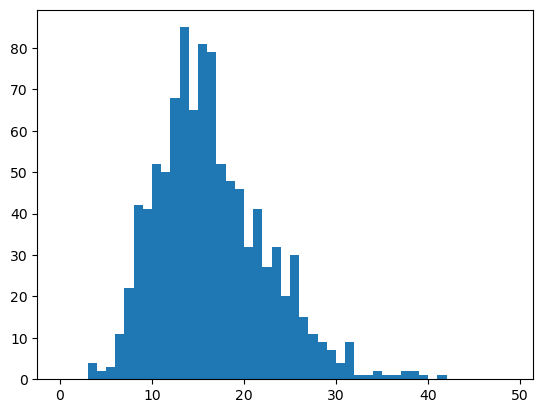

In [29]:
plt.hist(list(RF_design_data.values()), bins=range(0, 50, 1))
plt.show()